# Exploratory Data Analysis (EDA): Restaurant Tips Dataset

**Author:** Grace Tulsi  
**Repository:** https://github.com/gracetulsi/datafun-04-notebooks  
**Date:** 2026-01  

## Purpose
This notebook explores patterns in restaurant tipping behavior using a repeatable exploratory data analysis (EDA) workflow.  
The goal is to practice working with tabular data, visualizing relationships, and communicating insights using professional analytics tools.

## Dataset Information
- **Dataset:** Restaurant Tips  
- **Description:** Records of restaurant bills, tip amounts, party size, and customer attributes such as day, time, sex, and smoker status.  
- **Source:** Seaborn built-in dataset  
- **Access:** `sns.load_dataset("tips")`


## Section 0. Intro to Jupyter Notebooks

This is a Markdown cell (not a Python cell). 
Here are a few tips to help you get started with Jupyter Notebooks:

- To run a cell, press **Ctrl+Enter** (or **Cmd+Enter** on Mac) when you're done editing the cell.
- You can change the type of a cell (e.g., code or markdown) by looking in the lower left corner of the notebook interface.
- You can rearrange cells by dragging and dropping them within the notebook.
- After creating a new notebook, use **File > Save as** to rename and save it into your repository folder.
- To select a kernel (Python environment) for your notebook in Visual Studio Code, click on the **Select Kernel** name in the top-right corner of the notebook interface and choose the desired kernel from the dropdown menu. Follow suggestions to install recommended extensions. Once installed, click Select Kernel / Python Environments and choose the Recommended `.venv` option we created earlier. This will create a new kernel for the notebook and allow you to run code in the notebook using the packages installed in the virtual environment.

Once you are skilled with Notebooks, you can delete this entire cell or make your own notes.

This is a Markdown cell.  


## Section 0. Intro to EDA

### WHEN to do EDA

Perform Exploratory Data Analysis (EDA) when encountering a new data source, even if:

- You did not collect the data
- Someone else already analyzed it
- It comes from a trusted system

EDA helps you understand:

- What data you actually have
- What is missing, duplicated, or inconsistent
- What questions the data can and cannot answer

### GOALS of EDA

EDA is not the final report. EDA is about:

- Understanding structure and scale
- Detecting issues early
- Identifying next steps (cleaning, modeling, collection)

This notebook shows a standard EDA workflow that works for most **tabular** datasets.

Once you understand EDA, you can delete this entire cell or make your own notes.

This is a Markdown cell.

## Section 1. Project Setup and Imports

All imports and configuration appear once, at the top of the notebook.

WHY:
- Keeps notebooks readable and reproducible
- Mirrors professional scripts
- Makes it clear what must be installed

This is a Markdown cell.

In [1]:
# This is a Python cell.

# Imports at the top of the file
# REQ.EXTERNAL.DEPS: External packages must be defined in pyproject.toml
# REQ.EXTERNAL.DEPS.INSTALLED: external packages must be installed in the environment using uv sync command
# REQ.EXTERNAL.DEPS.IMPORTED: external packages used in this notebook must be imported here


from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Type hint for Axes object (basic plot type returned by Seaborn)
# A seaborn plot is a set of axes and you can set the title, labels, etc. on the axes.

# A figure can contain multiple axes (plots)
# from matplotlib.figure import Figure

# Pandas display configuration (helps in notebooks)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Imports complete.")

Imports complete.


## Section 2. Load the Data

This is a Markdown cell.

WHY: Before analysis, load the data to confirm:

- The dataset loads successfully
- The structure matches expectations
- Column names are available and readable

This is a Markdown cell.

In [2]:
# Python cell
# Load the restaurant tips dataset from Seaborn
# Store it in a pandas DataFrame (2D table)

tips_df: pd.DataFrame = sns.load_dataset("tips")

# Preview the first few rows to understand structure and column names
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Section 3. Inspect Data Shape and Structure

WHY: First, understand the shape (basic structure) of the data:

- How many rows and columns are there?
- What types of data are present?
- Are there obvious missing values?

This step determines challenges we might have downstream (later).

This is a Markdown cell.

In [3]:
# Section 3 Python cell
# Get shape: number of rows and columns

shape: tuple[int, int] = tips_df.shape

# Communicate the shape clearly
print(f"The tips dataset has {shape[0]} rows and {shape[1]} columns.")

The tips dataset has 244 rows and 7 columns.


In [4]:
# Section 3 Python cell
# Display column names, data types, and non-null counts

tips_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
# Section 3 Python cell
# List the column names

print("Column names:")
print(list(tips_df.columns))

Column names:
['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


## Section 4. Create Data Dictionary and Check Data Quality

WHY: Missing data is normal. We need to find out how much and where.

Missing data affects:

- Visualizations
- Summary statistics
- Machine learning models

LOOK FOR: 

- Columns with many missing values
- Patterns (entire rows missing multiple fields)

This is a Markdown cell.


In [6]:
# Section 4 Python cell
# Count missing values in each column

print("Missing values per column:")
print(tips_df.isnull().sum())

Missing values per column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [7]:
# Section 4 Python cell
# Check for duplicate rows

num_duplicates = tips_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 1


## Section 5. Create Clean View for EDA

WHY: We often want to work with complete data for visualizations and statistics.

Strategy:
- Keep the original DataFrame unchanged
- Create a separate clean view by dropping rows with missing values

This is a Markdown cell.

In [ ]:
# Section 5 Python cell
# Investigate duplicate rows in the dataset

duplicates = tips_df[tips_df.duplicated(keep=False)]

print("Duplicate rows found:")
duplicates

Duplicate rows found:


,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


## Duplicate Rows Assessment

One duplicate row was identified in the dataset. After inspecting the duplicated values, the row appears to represent a plausible restaurant scenario (e.g., same bill amount, party size, and time of day).

Because this dataset represents transactional behavior rather than unique identifiers, identical rows may reasonably correspond to distinct dining events.

Therefore, the duplicate row was retained for analysis.

## Section 6. Descriptive Statistics for Numeric Columns

WHY: Summary statistics give us a quick overview of the numeric data:

- Central tendency (mean)
- Spread (std, min, max)
- Distribution shape (quartiles)

This is a Markdown cell.

In [9]:
# Section 6 Python cell
# Summary statistics for numeric columns

tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
# Section 6 Python cell
# Additional statistics for the tip amount

mean_tip = np.mean(tips_df["tip"])
std_tip = np.std(tips_df["tip"])
min_tip = np.min(tips_df["tip"])
max_tip = np.max(tips_df["tip"])
range_tip = np.ptp(tips_df["tip"])  # max - min

print("Tip Amount Statistics:")
print(f"  Mean tip: {mean_tip:.2f}")
print(f"  Std dev: {std_tip:.2f}")
print(f"  Min tip: {min_tip:.2f}")
print(f"  Max tip: {max_tip:.2f}")
print(f"  Range: {range_tip:.2f}")

Tip Amount Statistics:
  Mean tip: 3.00
  Std dev: 1.38
  Min tip: 1.00
  Max tip: 10.00
  Range: 9.00


## Section 7. Correlation Matrix for Numeric Columns

WHY: Correlation tells us how numeric variables relate to each other.

- Values near 1 or -1 indicate strong relationships
- Values near 0 indicate weak or no linear relationship

This is a Markdown cell.

In [11]:
# Section 7 Python cell
# Select only numeric columns and compute correlation matrix

numeric_cols = tips_df.select_dtypes(include="number")
correlation_matrix = numeric_cols.corr()

print(correlation_matrix)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


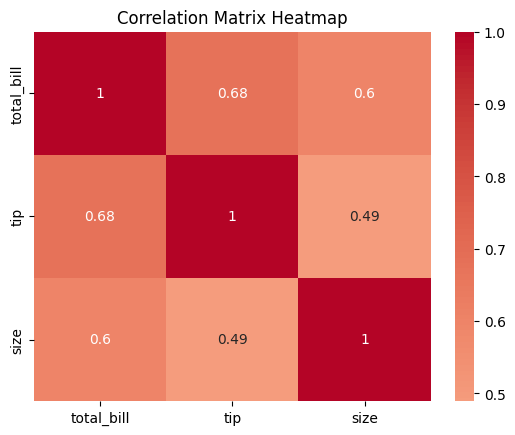

In [12]:
# Section 7 Python cell
# Visualize the correlation matrix as a heatmap

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


## Correlation Interpretation

The correlation matrix shows a moderate positive relationship between total bill amount and tip, indicating that larger bills are generally associated with larger tips. Party size also shows a positive but weaker relationship with both total bill and tip.

No extremely strong correlations are present, which is expected for behavioral data influenced by multiple factors. Overall, the results suggest that while bill size is an important factor in tipping behavior, it does not fully explain tip amounts on its own.

## Section 8. Make Plots

WHY: Visualizations reveal patterns not obvious in tables.

Create:
1. A scatter plot to see relationships between two variables
2. A box plot to compare distributions across groups

This is a Markdown cell.

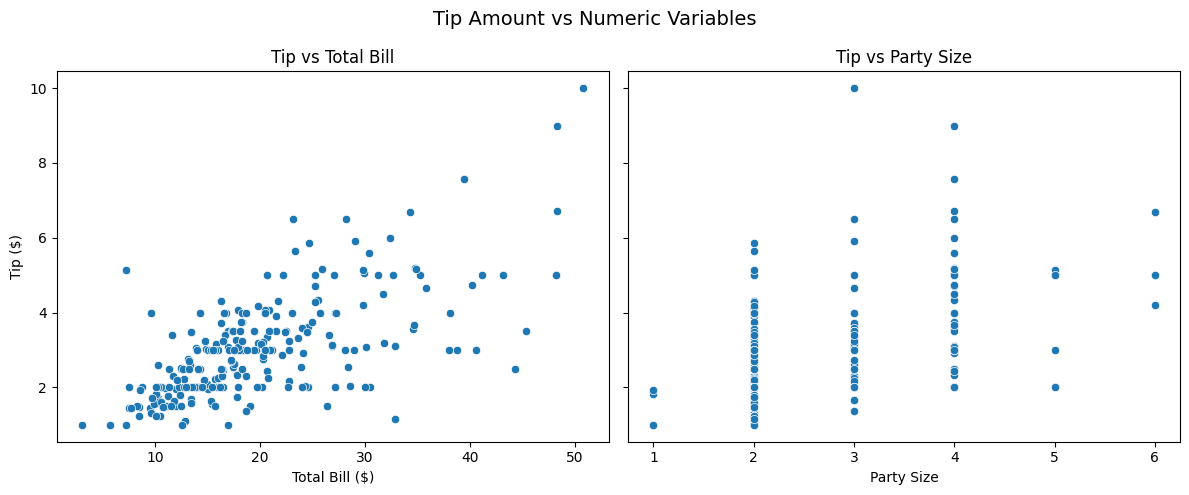

In [13]:
# Section 8 Python cell
# Scatter plots: tip vs numeric variables (faceted)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.scatterplot(
    data=tips_df,
    x="total_bill",
    y="tip",
    ax=axes[0]
)
axes[0].set_title("Tip vs Total Bill")
axes[0].set_xlabel("Total Bill ($)")
axes[0].set_ylabel("Tip ($)")

sns.scatterplot(
    data=tips_df,
    x="size",
    y="tip",
    ax=axes[1]
)
axes[1].set_title("Tip vs Party Size")
axes[1].set_xlabel("Party Size")

plt.suptitle("Tip Amount vs Numeric Variables", fontsize=14)
plt.tight_layout()
plt.show()


## Exploratory Linear Relationship: Tip vs Total Bill

To further examine the relationship between total bill amount and tip, a simple linear trend is visualized below. This regression is exploratory in nature and is intended to highlight general patterns rather than build a predictive model.

The plot helps assess whether a linear relationship between bill size and tip amount is reasonable based on the observed data.

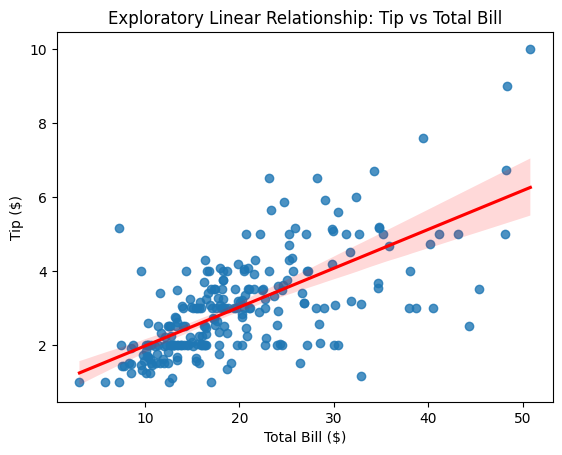

In [14]:
# Optional: Exploratory linear regression (tip vs total bill)

sns.regplot(
    data=tips_df,
    x="total_bill",
    y="tip",
    line_kws={"color": "red"}
)

plt.title("Exploratory Linear Relationship: Tip vs Total Bill")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.show()

The regression line indicates a positive linear relationship between total bill and tip, though substantial variability remains. This suggests that bill size influences tipping behavior but does not fully determine tip amount.

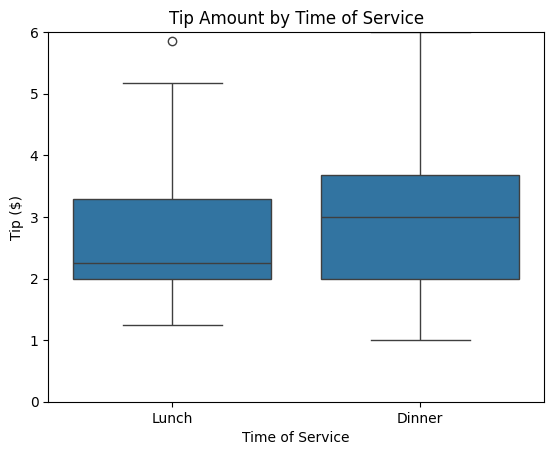

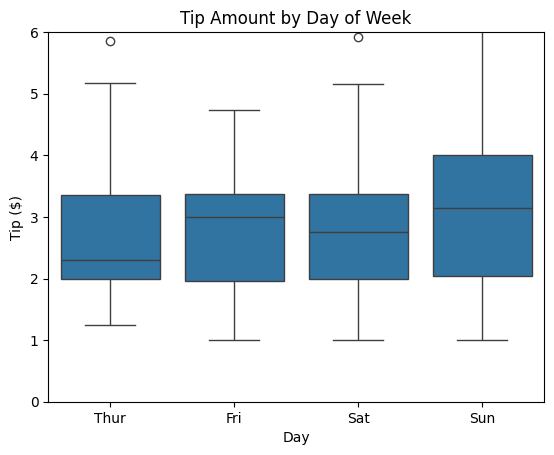

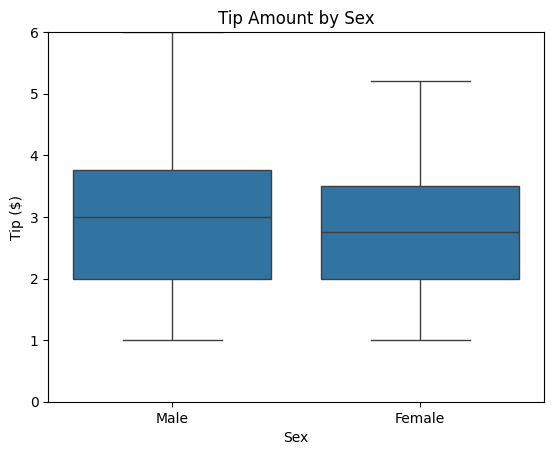

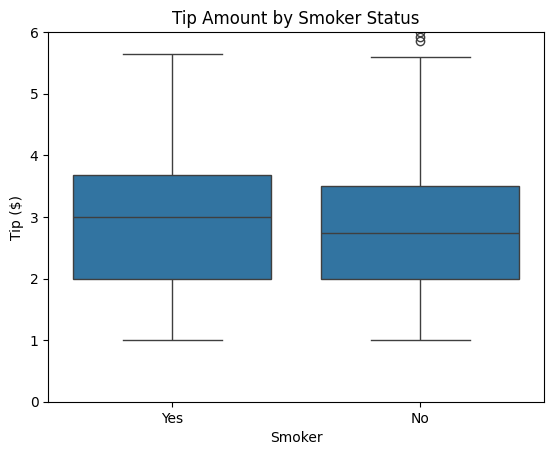

In [18]:
# Section 8 Python cell
# Box plots of tip amount by categorical variables (one plot at a time)

# Tip by Time
sns.boxplot(
    data=tips_df,
    x="time",
    y="tip",
    order=["Lunch", "Dinner"]
)
plt.ylim(0, 6)
plt.title("Tip Amount by Time of Service")
plt.xlabel("Time of Service")
plt.ylabel("Tip ($)")
plt.show()

# Tip by Day
sns.boxplot(
    data=tips_df,
    x="day",
    y="tip",
    order=["Thur", "Fri", "Sat", "Sun"]
)
plt.ylim(0, 6)
plt.title("Tip Amount by Day of Week")
plt.xlabel("Day")
plt.ylabel("Tip ($)")
plt.show()

# Tip by Sex
sns.boxplot(
    data=tips_df,
    x="sex",
    y="tip",
    order=["Male", "Female"]
)
plt.ylim(0, 6)
plt.title("Tip Amount by Sex")
plt.xlabel("Sex")
plt.ylabel("Tip ($)")
plt.show()

# Tip by Smoker Status
sns.boxplot(
    data=tips_df,
    x="smoker",
    y="tip",
    order=["Yes", "No"]
)
plt.ylim(0, 6)
plt.title("Tip Amount by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Tip ($)")
plt.show()

## Section 9. Reminder: Run All before sending to GitHub

Before saving a notebook (and running git add-commit-push), click 'Run All' to generate all outputs and display them in the notebook. 

This is a Markdown cell.
